In [1]:
# import depenedencies
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [7]:
# load data
ohtani = pd.read_csv("660271_data.csv")

In [8]:
# preview data
ohtani.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2022-07-13,82.6,-2.12,5.39,"Ohtani, Shohei",660271,664299,walk,blocked_ball,...,1,1,3,3,1,Infield shift,Standard,307.0,0.013,0.057
1,CH,2022-07-13,83.9,-2.05,5.51,"Ohtani, Shohei",660271,664299,NaN,ball,...,1,1,3,3,1,Infield shift,Standard,217.0,0.000,0.086
2,CH,2022-07-13,85.1,-2.00,5.47,"Ohtani, Shohei",660271,664299,NaN,ball,...,1,1,3,3,1,Infield shift,Standard,232.0,0.000,0.053
3,CH,2022-07-13,85.2,-1.98,5.36,"Ohtani, Shohei",660271,664299,NaN,blocked_ball,...,1,1,3,3,1,Infield shift,Standard,249.0,0.000,0.038
4,FF,2022-07-13,95.5,-1.73,5.43,"Ohtani, Shohei",660271,664299,triple,hit_into_play,...,0,0,3,3,0,Infield shift,Standard,209.0,0.170,2.051


In [9]:
# see what kinds of data was collected
ohtani.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [11]:
# filter for 2021 season
ohtani21 = ohtani[pd.to_datetime(ohtani18_22.game_date).dt.year==2021]

Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
NumExpr defaulting to 8 threads.


In [12]:
# Summarize Ohtani's batted events in 2021
ohtani21["events"].value_counts()

field_out                    190
strikeout                    188
walk                          76
single                        58
home_run                      46
double                        26
triple                         8
grounded_into_double_play      7
field_error                    6
hit_by_pitch                   4
force_out                      4
fielders_choice                3
sac_fly                        2
strikeout_double_play          1
pickoff_3b                     1
Name: events, dtype: int64

In [13]:
# filter for just Ohtani's homeruns in 2021
ohtani21_hr = ohtani21[ohtani21.events=="home_run"]

In [14]:
# how fast were the pitches that Ohtani hit home runs off of? How fast were they on average?
ohtani21_hr.release_speed.mean()

88.69565217391305

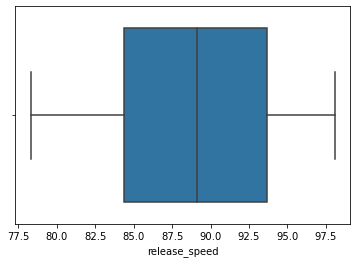

In [15]:
# means can fail to tell the whole picture, so let's see the box plot
sns.boxplot(x="release_speed", data=ohtani21_hr)
plt.show()

In [17]:
# how do these pitches compare to the pitches he struck out on?
ohtani21_so = ohtani21[ohtani21.events == "strikeout"]
ohtani21_so.release_speed.mean()

88.1526595744681

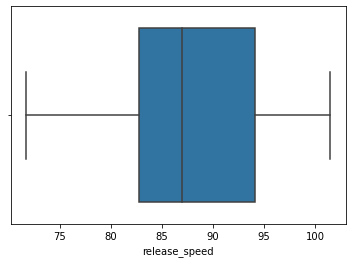

In [18]:
sns.boxplot(x="release_speed", data=ohtani21_so)
plt.show()

In [28]:
# how does it look when we look at pitch type?
pt_hr = ohtani21_hr.pitch_type.value_counts().sort_index(ascending=True)
pt_hr

CH     7
CU     1
FC     4
FF    12
FS     1
KC     1
SI     7
SL    13
Name: pitch_type, dtype: int64

In [29]:
pt_so = ohtani21_so.pitch_type.value_counts().sort_index(ascending=True)
pt_so

CH    28
CU    23
FC     7
FF    64
FS     5
KC     8
SI    13
SL    40
Name: pitch_type, dtype: int64

In [33]:
# which pitch types against Ohtani were more likely to produce home runs than strike outs?
hr_vs_so = pt_hr/pt_so
hr_vs_so.sort_values(ascending=False)

FC    0.571429
SI    0.538462
SL    0.325000
CH    0.250000
FS    0.200000
FF    0.187500
KC    0.125000
CU    0.043478
Name: pitch_type, dtype: float64

In [35]:
# for the pitches that Ohtani homered off of, was there a lot of variation in speed by pitch type
ohtani21_hr.groupby("pitch_type")["release_speed"].mean()

pitch_type
CH    85.814286
CU    80.700000
FC    89.525000
FF    94.416667
FS    89.300000
KC    79.400000
SI    93.200000
SL    83.569231
Name: release_speed, dtype: float64

In [36]:
# for the pitches that Ohtani struck out on, was there a lot of variation in speed by pitch type
ohtani21_so.groupby("pitch_type")["release_speed"].mean()

pitch_type
CH    84.125000
CU    80.447826
FC    89.914286
FF    94.829687
FS    85.620000
KC    84.175000
SI    94.784615
SL    83.367500
Name: release_speed, dtype: float64

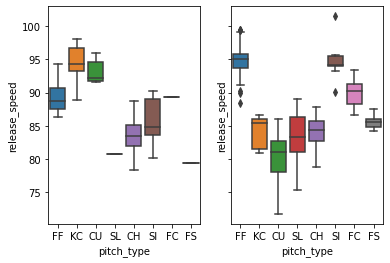

In [41]:
fig, axs = plt.subplots(ncols=2, sharex=True, sharey=True)
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_hr, ax=axs[0])
sns.boxplot(y="release_speed", x="pitch_type", data=ohtani21_so, ax=axs[1])
plt.show()